In [22]:
import numpy as np
from scipy import signal
import sys
import pandas as pd

In [23]:
#args = sys.argv
#PATH = args[1]

# jupyter notebookのときはここで指定
PATH = '../Data_block/analysis_by_programs/20170130ar/32ch/MAL10/'


In [24]:
# 読み込みたいファイルのパス
PATH_rest = PATH + 'raw_rest.csv'
PATH_tap = PATH + 'raw_tap.csv'

# csvファイル読み込み
rest = pd.read_csv(PATH_rest, header = 0)
tap = pd.read_csv(PATH_tap, header = 0)

In [25]:
data=rest

In [31]:
TAUs=[]

i=3
voxel = data.iloc[:, i]
x = np.correlate(voxel, voxel, mode = 'full')
first_min = signal.argrelmin(x)
TAUs.append(first_min[0][0])

IndexError: index 0 is out of bounds for axis 0 with size 0

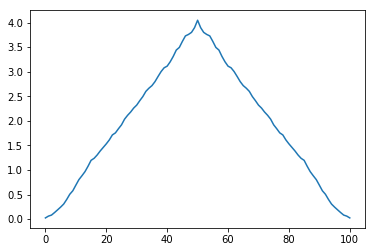

In [34]:
plt.plot(x)